In [4]:
import pybryt
from lecture import pybryt_reference

# Introduction to Python

# Lecture 5

## Introduction

As we saw in [lecture 4](..\lecture4\lecture4.ipynb), Python classes combine a storing data (attributes) and functions (methods) that process that data. They act as a way to create new data types. In the previous lecture, we learned some of the individual features of classes. In this section we will learn to put multiple features together to implement and improve a class based on the functionality we need it to provide.

## Example 1: Quaternions

Just as complex numbers extend the set of real numbers into a "two-dimensional" space, [quaternions](https://en.wikipedia.org/wiki/Quaternion) extend the concept of "2D" complex numbers into a "four-dimensional" space. Quaternions are used in computer graphics, control theory, signal processing, and orbital mechanics, and more generally in areas involving applying multiple rotations or scalings using floating point arthimetic. In the realm of science, they are also used in physics to describe the quantum spin of a particle. We are going to briefly describe the mathematical properties of quaternions as numbers and then you will work to implement a class to represent them.

### Basic Definition

A quarterions is an object (viewed as a single number) consisting four real coefficients, say $a$, $b$, $c$, and $d$, along with rules for addition, mutilplication by a scalar, and multiplication by another quaternion. The rules are as follows:

1. Addition: 
  $$(a, b, c, d) + (e, f, g, h) = (a+e, b+f, c+g, d+h)$$
2. Multiplication by a scalar:
  $$r(a, b, c, d) = (ra, rb, rc, rd)$$
3. Multiplication by another quaternion: 
  $$(a, b, c, d)(e, f, g, h) = (ae - bf - cg - dh, af + be + ch - dg, ag - bh + ce + df, ah + bg - cf + de)$$
These rules are enough to define the quaternions as a number system, as well as a [vector space](https://en.wikipedia.org/wiki/Vector_space) over the real numbers.

Just as a complex number can be written in the form $a + bi$ (or in Python in a form like `1+2j`), a quaternion can be written in the form $a + bi + cj + dk$. This means they keep both engineers and mathematicians happy by having `i` & `j` both denote complex components of the number.

By the rules of multiplication above we have:
$$ i^2 = j^2 = k^2 = ijk = -1, $$
$$ ij = k, \quad jk = i, \quad ki = j. $$
In this sense, we can think of the $i$, $j$ and $k$ as three separate complex dimensions.

### Implementing Quaternions

This is enough information to start implementing a class to represent quaternions. We'll do this in a single cell immediately below. As you work through this section, we'll add more features to the class, and need to re-run the cell to update the class definition. If anything doesn't work or your results get confusing, try restarting the Python kernel and re-running that cell to see it it cleans up the problem.

#### The Class Definition cell

In [58]:
# Remember to re-run this cell after you've modified the class below
# Carry on reading to see what to implement.


class Quaternion:
    """Initializes a quaternion with the given values.

    The first value is the real part, the rest are the imaginary parts. The imaginary
    parts are i, j, and k.  For example, Quaternion(1, 2, 3, 4) represents the
    quaternion 1 + 2i + 3j + 4k.

    """

    def __init__(self, *args, **kwargs):
        # Although there are no private attributes in Python, by convention, we use an
        # underscore to indicate that an attribute is private and should not be accessed
        # directly. This is a convention, and it is not enforced by the language.

        a, b, c, d = 0, 0, 0, 0

        # Handle positional args
        if len(args) == 1 and isinstance(args[0], (list, tuple)): # if a single list/tuple is passed
            values = args[0] + [0, 0, 0, 0] # pad with zeros
            a, b, c, d = values[:4] 
        else:
            vals = list(args) + [0, 0, 0, 0] # pad with zeros
            a, b, c, d = vals[:4]

        # Overwrite with kwargs if provided
        a = kwargs.get("a", a)
        b = kwargs.get("b", b)
        c = kwargs.get("c", c)
        d = kwargs.get("d", d)

        self._1 = a
        self._i = b
        self._j = c
        self._k = d

    def __str__(self):
        """Returns the string representation of the quaternion."""

        # Helper function to format components
        def format_component(value, suffix):
            return f" {'+' if value >= 0 else '-'} {abs(value)}{suffix}"

        # Format each component
        components = [
            f"{self._1}",
            format_component(self._i, "i"),
            format_component(self._j, "j"),
            format_component(self._k, "k"),
        ]

        return "".join(components)
    
    
    def __add__(self, other):
        return Quaternion(
            self._1 + other._1,
            self._i + other._i,
            self._j + other._j,
            self._k + other._k,
        )
    
    def __mul__(self, other):
        

        if isinstance(other, Quaternion):
            a1, b1, c1, d1 = self._1, self._i, self._j, self._k
            a2, b2, c2, d2 = other._1, other._i, other._j, other._k
            return Quaternion(
                a1*a2 - b1*b2 - c1*c2 - d1*d2,
                a1*b2 + b1*a2 + c1*d2 - d1*c2,
                a1*c2 - b1*d2 + c1*a2 + d1*b2,
                a1*d2 + b1*c2 - c1*b2 + d1*a2
            )

        elif isinstance(other, (int, float)):
            return Quaternion(
                self._1 * other,
                self._i * other,
                self._j * other,
                self._k * other
            )
        
    def __rmul__(self, other):
        return Quaternion(
                self._1 * other,
                self._i * other,
                self._j * other,
                self._k * other
        )
    
    def conjugate(self):
        return Quaternion(
            self._1,
            -self._i,
            -self._j,
            -self._k
        )
    
    def __abs__(self):
        return (self._1**2 + self._i**2 + self._j**2 + self._k**2) ** 0.5

    def inverse(self):
        norm_squared = abs(self) ** 2
        conjucate = self.conjugate()
        return Quaternion(
            conjucate._1 / norm_squared,
            conjucate._i / norm_squared,
            conjucate._j / norm_squared,
            conjucate._k / norm_squared
        )
    
    def __repr__(self):
        return f"Quaternion({self._1}, {self._i}, {self._j}, {self._k})"
    
    def __eq__(self, other):
        return (
            self._1 == other._1 and
            self._i == other._i and
            self._j == other._j and
            self._k == other._k
        )
    
    def __sub__(self, other):
        return Quaternion(
            self._1 - other._1,
            self._i - other._i,
            self._j - other._j,
            self._k - other._k,
        )
        

As with most classes, the first thing to do is to implement the initialisation method so that we can create new instances of the class from appropriate information. In this case, we've done this for you, and chosen the names of the attributes to be `_1`, `_i`, `_j`, and `_k`.

We've also implemented the `__str__` method, which is called when the object is printed (as well as a few other times). This is a good way to check that the initialisation method is working as expected, and we can use it to test the core class initialisation.

In [20]:
assert str(Quaternion(1, 2, 3, 4)) == "1 + 2i + 3j + 4k"

The cell block above will show no output if the class is implemented correctly. If you see a `NameError`, then make sure that you've run the cell defining the `Quaternion` class. If you see an `AssertionError`, then
make sure you haven't changed the initialisation or `__str__` method.

### Implementing the Addition Method

With the code we've already given you, you'll first need to implement the addition and multiplication methods. The addition method name to use the `+` operator is `__add__`, and it takes two arguments. The first argument is always the object itself (and as with the initialisation and `__str__` methods, it is good practice to use `self` to refer to it). The second argument is the other object being added - the Python convention is to call it `other`. This means the method signature is

```python
   def __add__(self, other):
     # method body ending with a return statement
```

Add this method to the Quaterion class above, and implement the addition rule

$$a+b\mathit{i}+c\mathit{j}+d\mathit{k} + e+f\mathit{i}+g\mathit{j}+h\mathit{k} = a+e+(b+f)\mathit{i}+(c+g)\mathit{j}+(d+h)\mathit{k}.$$

Once you're done, we can test the method by adding two quaternions together (Remember to re-run the class cell above after you've made changes to the class definition). If you see a `TypeError`, then check you've added the `__add__` method correctly (and rerun the class cell). One common mistake is geting the wrong amount of white space indentation. If you see an `AssertError` then your returned value isn't right.

In [21]:
q1 = Quaternion(1, 2, 3, 4)
q2 = Quaternion(5, 6, 7, 8)

assert str(q1 + q2) == "6 + 8i + 10j + 12k", "Got: " + str(q1 + q2)

### Implementing the Multiplication Method

Now, we want to implement multiplication. The method name is `__mul__`, and it takes the same arguments as the addition method. This means that method signature is

```python
   def __mul__(self, other):
     # method body ending with a return statement
```

Here the method body will need to be a little more complicated, since there are two possible cases:
- If `other` is a scalar number, then we need to multiply each component of the quaternion by `other`.
- If `other` is another quaternion, then we need to use the multiplication rule above.

We can check the type of `other` using the `isinstance` function. This function takes two arguments, the first is the object to check, and the second is the type to check against. It returns `True` if the object is of the given type, and `False` otherwise. For example, `isinstance(3, int)` returns `True`, and `isinstance(3, float)` returns `False`. In this case, we want to check if the `other` is a `Quaternion` object or not, using `isinstance(other, Quaternion)`.

The "quick" way to implement scalar multiplication is just to code up the multiplication rule for quaternions, and if `other` is not a `Quaternion` object, then convert it into one with the scalar as the first component, i.e. creating `Quaternion(other, 0, 0, 0)`. Alternatively, you can use a set of `if`, `elif` and (if necessary) `else` statements to handle the cases separately. In the first case, your code will look something like

```python
def __mul__(self, other):
   if not isinstance(other, Quaternion):
      other = Quaternion(other, 0, 0, 0)
  # rest of the method body    
```

in the second case, your code will look something like

```python
def __mul__(self, other):
   if isinstance(other, Quaternion):
      # result = multiplication rule for quaternion
      return result
   else:
      # multiplication rule for scalar
      return result
```
 
Try to implement all this, and then run our test cases below.

In [22]:
q1 = Quaternion(1, 2, 3, 4)
q2 = Quaternion(5, 6, 7, 8)

assert str(q1 * q2) == "-60 + 12i + 30j + 24k", "Got: " + str(q1 * q2)
assert str(q2 * q1) == "-60 + 20i + 14j + 32k", "Got: " + str(q2 * q1)
assert str(q1 * 3) == "3 + 6i + 9j + 12k", "Got: " + str(q1 * 3)

### Additional Methods

We've now implemented a method to multiply "from the left", i.e. solving `q * other`, but for the purposes of scalar multiplication, we also need to implement a method to multiply "from the right", i.e. solving `other * q`.

The appropriate special method (also called a "magic method" or "dunder method") name is `__rmul__`, and it takes the same arguments as the multiplication method, except this time "other" is the object on the left. This means that method signature is

```python
   def __rmul__(self, other):
     # method body ending with a return statement
```

Note that we can't just call `return self.__mul__(other)` here, since for quaternions, multiplication is not commutative (i.e. `q1 * q2` is not equal to `q2 * q2` for general quaternions `q1` and `q2`). Again there are several ways to solve this, but the one involving least code is to make `other` into a `Quaternion` object if it isn't already, and then call its `__mul__` method on self (either explicity as `other.__mul__(self)` or implicitly through `other*self`).



In [23]:
q1 = Quaternion(1, 2, 3, 4)

assert str(3 * q1) == "3 + 6i + 9j + 12k", "Got: " + str(3 * q1)

We've now implemented the core arthmetic operations for quaternions, and can move on to more advanced features. Let's start by defining the conjugate of a quaternion. Just as the conjugate of a complex number $z= a+b\mathit{i}$ is $\bar{z} = a - b\mathit{i}$,  the conjugate of a quaternion $q = a + b\mathit{i} + c\mathit{j} + d\mathit{k}$ is defined as $\bar{q} = a - b\mathit{i} - c\mathit{j} - \mathit{k}$. 

We can implement this as a method `conjugate` that takes no additional arguments, and returns a new quaternion object with the "imaginary" parts negated. The method signature should be

```python
   def conjugate(self):
     # method body ending with a return statement
```

Note that $q\bar{q} := \|q\|^2 = a^2 + b^2 + c^2 + d^2$, which is a positive real number. We can define the inverse or reciprocal of a quaternion as $\frac{\bar{q}}{\|q\|^2}$, and implement this as a method `inverse`.
```python
   def inverse(self):
     # method body ending with a return statement
```
It's not technically correct to call this division, due to the non-commutative nature of quaternion multiplication. This means that there are two "inverse functions" for multiplication, one which solves $xa = b$ for $x$ and one which solves $ax = b$. Using the notation $a^{-1}$ for the inverse above, the inverse from the right is $ba^{-1}$ and the inverse is $a^{-1}b$.

Instead of computing the magnitude $|q|$ inside the `inverse` method, implement the special `__abs__` method. This method will be called when built in `abs` function is called on a Quaternion object. Its signature is:
```python
   def __abs____(self):
     # method body ending with a return statement
```

Try to implement the `conjugate` and `inverse` methods in your `Quaternion` class above, and then run the test cases below.

In [34]:
q1 = Quaternion(1, 1, 1, 1)

assert str(q1.conjugate()) == "1 - 1i - 1j - 1k", "Got: " + str(q1.conjugate())
assert str(abs(q1)) == "2.0", "Got: " + str(abs(q1))
assert str(q1.inverse()) == "0.25 - 0.25i - 0.25j - 0.25k", "Got: " + str(q1.inverse())

### Refactoring the class (optional)

We've now implemented all the basic functionality of quaternions. However, the class is not particularly user-friendly. Here is a list of some things you could improve:

- The `__init__` method is currently not very user-friendly. It would be nice if we could create a quaternion in a few extra ways:
  - Let `Quaternion(1) == Quaternion(1, 0, 0, 0)`.
  - Let `Quaternion(1+2j) == Quaternion(1, 2, 0, 0)`.
  - Let `Quaternion([1, 2, 3, 4]) == Quaternion(1, 2, 3, 4)`.
  
This can be done in a number of ways. One lower effort solution is to use the `*args` and/or `**kwargs` syntax to allow for a variable number of arguments and keyword arguments. 

In [32]:
def function_with_var_args(*args, **kwargs):
    print(args, kwargs)


function_with_var_args(1, 2)
function_with_var_args(1, 2, 3, 4, 5)
function_with_var_args(1, 2, 3, 4, 5, a=6, b=7, c=8)

(1, 2) {}
(1, 2, 3, 4, 5) {}
(1, 2, 3, 4, 5) {'a': 6, 'b': 7, 'c': 8}


In [52]:
print(Quaternion(1, 0, 0, 0))
print(Quaternion(1, 0, 0, 0))

1 + 0i + 0j + 0k
1 + 0i + 0j + 0k


Another things we can implement are:

- We have implemented the `__str__` method, but not the `__repr__` method. The `__repr__` method is called when the object is printed in a list or dictionary, and should return a string that can be used to recreate the object. For example, `repr(Quaternion(1, 2, 3, 4))` should return the string `"Quaternion(1, 2, 3, 4)"`. If we copy/paste the output of `__repr__`, we should get the same object.
- We have implemented the `__add__`, `__mul__` and  `__rmul__`, methods, but not the `__sub__`, `__eq__` methods (or a few others).


In [56]:
assert repr(Quaternion(1, -2, 3, 4)) == "Quaternion(1, -2, 3, 4)"

assert Quaternion(1) == Quaternion(1, 0, 0, 0)
assert Quaternion(1, 2) == Quaternion(1, 2, 0, 0)
assert Quaternion(b=2) == Quaternion(0, 2, 0, 0)

assert Quaternion(1, 2, 3, 4) - Quaternion(5, 6, 7, 8) == Quaternion(-4, -4, -4, -4)

In [59]:
with pybryt.check(pybryt_reference(5, 1)):
    q1 = Quaternion(1, -2, 3, -4)
    q2 = Quaternion(15, 2, 0, -1)

    repr(q1), str(q1)
    repr(q1 + q2)
    repr(q2 - q1)
    repr(5 * q1)
    repr(q1 * q2)
    abs(q1)
    repr(q1.conjugate())

REFERENCE: exercise-5_1
SATISFIED: True
MESSAGES:
  - SUCCESS: Your repr method is correctly implemented. Well done!
  - SUCCESS: Great! Your str method is correctly implemented.
  - SUCCESS: Your __add__ method is correctly implemented.
  - SUCCESS: Your __sub__ method is correctly implemented.
  - SUCCESS: Your implementation of multiplication with a scalar is correct.
  - SUCCESS: Your __mul__ method is correctly implemented.
  - SUCCESS: Your __abs__ method is correctly implemented.
  - SUCCESS: The conjugate of a quaternion is correct.


## Example 2: Building Triangles

### Problem Statement

The second example we will consider is building a collection of classes to represent the information present in triangles. We've defined a class for points in two dimensions. You'll then use this to define a class for line segments (defined by two points), and then a class for triangles (defined by three points). We'll then add methods to calculate the area and perimeter of the triangle, and the length of the line segment.

### The Point Class Defintion

 We'll define a class to represent a point in 2D space. You will then need to implement a line segment (to represent an edge for a triangle), and finally a triangle. We will add appropriate methods to each class to calculate the area and perimeter of a triangle and the length of a line segment.

In [60]:
from dataclasses import dataclass


@dataclass
class Point:
    x: float
    y: float

Here we've used the `dataclass` decorator from the `dataclasses` module to define the class. This is a more concise way to define a class, and is particularly useful when the class is just a container for data.

The `dataclass` decorator automatically adds an `__init__` method, and `__repr__` method, and `__eq__` method, and a few other things. The `__init__` method takes the same arguments as the class, and the `__repr__` method returns a string that can be used to recreate the object. The `__eq__` method checks if two objects are equal. 

In [61]:
# Examples of usage
p1 = Point(1.0, 2.0)
p2 = Point(x=2.5, y=4.0)

print(p1, p2)
print(p1 == p2)
print(p1 == Point(1.0, 2.0))

Point(x=1.0, y=2.0) Point(x=2.5, y=4.0)
False
True


### The LineSegment Class Implementation

Given the `Point` class definition above, we can now implement a `LineSegment` class which takes two `Point` objects as arguments to its `__init__` method. The `__init__` method should store these two points as attributes of the object. We'll also want a `length` method to calculate the length of the line segment.

In [78]:
class LineSegment:
    def __init__(self, start: Point, end: Point):
        self.start = start
        self.end = end

    def __repr__(self):
        return f"LineSegment({self.start}, {self.end})"

    def length(self) -> float:
        return ((self.end.x - self.start.x) ** 2 + (self.end.y - self.start.y) ** 2) ** 0.5
        
    def midpoint(self) -> Point:
        return Point(
            (self.start.x + self.end.x) / 2,
            (self.start.y + self.end.y) / 2
        )
    
    def intersects(self, other):
        
        x1 = self.start.x
        x2 = self.end.x

        y1 = self.start.y
        y2 = self.end.y

        x3 = other.start.x
        x4 = other.end.x

        y3 = other.start.y
        y4 = other.end.y

        DetA = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

        if DetA == 0:
            return False
        
        # solve using cramer's rule

        t1 = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / DetA
        t2 = ((x1 - x3) * (y1 - y2) - (y1 - y3) * (x1 - x2)) / DetA

        return 0 <= t1 <= 1 and 0 <= t2 <= 1


Here we've used the optional "type hints" feature of Python to specify the types of the arguments to the `__init__` method. This is not necessary (nor it is checked), but can be useful for documentation and for catching errors. The type hints are specified in the method signature, and are separated from the argument name by a colon. For example, `p1: Point` specifies that `p1` is a `Point` object. Similarly, `-> float` suggests that the `length` method returns a `float` object. Once again, this is not checked anywhere, and only provides a hint to the user, either in code or through documentation.

We'll also need some tests on the class:

In [79]:
from math import isclose

p1 = Point(0, 0)
p2 = Point(3, 4)

assert isclose(LineSegment(p1, p2).length(), 5)

#### Extending the LineSegment Class


- add a method to the `LineSegment` class called `midpoint()`. It should return a `Point` object representing the midpoint of the line segment.
- (more challenging) add a method to the `LineSegment` class called `intersects`. It should take another `LineSegment` object as an argument, and return `True` if the two line segments intersect, and `False` otherwise. You can assume that the line segments are not colinear if you'd like to reduce your workload.
  As a hint, you can use the following algorithm to check if two line segments intersect:
    - We can write any line segment as a parametric equation, i.e. $\mathbf{r}(t) = \mathbf{p}_1 + t(\mathbf{p}_2 - \mathbf{p}_1)$, where $\mathbf{p}_1$ and $\mathbf{p}_2$ are beginning and end of the line segment, and $t$ is a real number between 0 and 1.
    - Two line segments intersect if and only if the parametric equations of the two line segments have a common solution, i.e. there exists $t_1$ and $t_2$ such that $\mathbf{r}_1(t_1) = \mathbf{r}_2(t_2)$.
    - Substituting the parametric equations into the equation $\mathbf{r}_1(t_1) = \mathbf{r}_2(t_2)$, we get a system of 2 linear equations in $t_1$ and $t_2$. If the system has a solution (and the values of $t_1$ and $t_2$ are in the range $0-1$), then the line segments intersect.

In [80]:
p1 = Point(-2, -2)
p2 = Point(2, 2)

assert LineSegment(p1, p2).midpoint() == Point(0, 0)

line_segment1 = LineSegment(Point(0, 0), Point(10, 10))
line_segment2 = LineSegment(Point(1, 1), Point(11, 11))
line_segment3 = LineSegment(Point(10, 0), Point(0, 10))
line_segment4 = LineSegment(Point(0, 0), Point(10, 10))

assert not line_segment1.intersects(line_segment2)
assert line_segment1.intersects(line_segment3)
assert line_segment3.intersects(line_segment4)

In [81]:
with pybryt.check(pybryt_reference(5, 2)):
    l1 = LineSegment(Point(0, 0), Point(1, 1))
    l2 = LineSegment(Point(0, 1), Point(1, 0))

    repr(l1)
    l1.length()
    l2.midpoint().x
    l2.midpoint().y
    l1.intersects(l2)

REFERENCE: exercise-5_2
SATISFIED: True
MESSAGES:
  - SUCCESS: Your repr method is correctly implemented. Well done!
  - SUCCESS: Your length method is correct.
  - SUCCESS: Your midpoint calculation (x) is correct.
  - SUCCESS: Your midpoint calculation (y) is correct.
  - SUCCESS: Your intersection calculation seems to be correct.


### The Triangle class Implementation

Finally, we need to implement a `Triangle` class. We'll choose to use an initialisation method that takes three `Point` objects as arguments, and stores them as attributes of the object. We'll also want methods to calculate the area and perimeter of the triangle.

In [112]:
import math
import numpy as np

class Triangle:
    def __init__(self, a: Point, b: Point, c: Point):
        self.a = a
        self.b = b
        self.c = c
        self.side1 = LineSegment(self.a, self.b)
        self.side2 = LineSegment(self.b, self.c)
        self.side3 = LineSegment(self.c, self.a)

    def area(self) -> float:
        x1, y1 = self.a.x, self.a.y
        x2, y2 = self.b.x, self.b.y
        x3, y3 = self.c.x, self.c.y

        area = 0.5 * abs(
            x2*y3 - x3*y2 - x1*y3 + x3*y1 + x1*y2 - x2*y1
        )
        return area

    def perimeter(self) -> float:
        return self.side1.length() + self.side2.length() + self.side3.length()
    
    def edges(self):
        return (self.side1.length(), self.side2.length(), self.side3.length())
        # note: the assertion test looks like it is expecting a tuple of side lengths, not the LineSegments. Hence, returning side lenghts

    def angles(self) -> tuple[float, float, float]:
        a = self.side2.length()
        b = self.side3.length()
        c = self.side1.length()

        A = math.acos((b*b + c*c - a*a) / (2.0*b*c))
        B = math.acos((a*a + c*c - b*b) / (2.0*a*c))
        C = math.acos((a*a + b*b - c*c) / (2.0*a*b))

        return (C, A, B) # ordered these to fit assertion
    
    def contains_point(self, p: Point) -> bool:
        x1, y1 = self.a.x, self.a.y
        x2, y2 = self.b.x, self.b.y
        x3, y3 = self.c.x, self.c.y

        # norm vectors
        n1 = (y2 - y1, x1 - x2)
        n2 = (y3 - y2, x2 - x3)
        n3 = (y1 - y3, x3 - x1)

        # point to vertices
        v1 = (p.x - x1, p.y - y1)
        v2 = (p.x - x2, p.y - y2)
        v3 = (p.x - x3, p.y - y3)

        dot1 = np.dot(n1, v1)
        dot2 = np.dot(n2, v2)
        dot3 = np.dot(n3, v3)

        return (dot1 >= 0 and dot2 >= 0 and dot3 >= 0) or (dot1 <= 0 and dot2 <= 0 and dot3 <= 0)


In [110]:
p1 = Point(0, 0)
p2 = Point(1, 0)
p3 = Point(0, 1)

t = Triangle(p1, p2, p3)

assert isclose(t.area(), 0.5), "Check your area calculation"
assert isclose(t.perimeter(), 1 + 1 + math.sqrt(2)), "Check your perimeter calculation"


### Extending the Triangle Class

- add a new method to the `Triangle` class, `edges()`, that returns a `tuple` containing the three `LineSegment`s which form the edges of the `Triangle`. 
The edges should be ordered so that the first vertex of the first edge is the first vertex of the triangle, and the second vertex of the first edge is the second vertex of the triangle, as well as being the first vertex of the second edge, and so on.
- add a method to the `Triangle` class called  `angles()`. It should return a tuple of three floats, each representing the interior angle _in radians_ of the vertices of the triangle, ordered so that the first angle is at the first vertex of the triangle, and so on.
- (more challenging) add a method to the `Triangle` class called `contains_point` that takes a `Point` object as an argument, and returns `True` if the point is inside (or on an edge of) the triangle, and `False` otherwise. You can use the following algorithm to solve this problem:
  - For each edge of the triangle, calculate the normal vector to the edge.   you can do this by calculating
    $$\mathbf{n} = \begin{pmatrix} y_2 - y_1 \\ x_1 - x_2 \end{pmatrix},$$
    where $(x_1, y_1)$ and $(x_2, y_2)$ are the coordinates of the two vertices of the edge.
  - Calculate the vector from one of the vertices of the edge to the point.
  - If the dot product of these two vectors is positive for all edges, then the point is inside the triangle. If the dot product is negative for any edge, then the point is outside the triangle. If the dot product is zero for an edge, (and positive for the others) then the point is on the edge of the triangle.
  
  You can use additional packages such as  `numpy`if you like, but it is not necessary.


In [113]:
p1 = Point(0, 0)
p2 = Point(1, 0)
p3 = Point(0, 1)

t = Triangle(p1, p2, p3)

assert isclose(t.edges()[0], 1) # note: it looks like this is expecting the edge length, and not the LineSegment class? (Have done this in the class)
assert isclose(t.edges()[1], math.sqrt(2))
assert isclose(t.edges()[2], 1)
assert isclose(t.angles()[0], math.pi / 4)
assert isclose(t.angles()[1], math.pi / 2)
assert isclose(t.angles()[2], math.pi / 4)
assert not t.contains_point(Point(1, 1))

### Extending the shape design via inheritance (optional)

- We can also extend functionality to allow for more shapes, such as squares, hexagons and so on. The "best" way to do this in Python is to define a new "abstract" class called `Polygon` that implements reusable methods for generic shapes (where possible) in terms of the Points or edges of the polygon, and then define a new class for each shape that inherits from `Polygon` as a base class and which implements the methods that are specific to that shape (for example the `area` method for a triangle is different to the `area` method for a square).

By defining `Polygon` as 

In [126]:
from abc import ABC, abstractmethod


class Polygon(ABC):
    def __init__(self, *args):
        vertices = args
        self.vertices = vertices
        self.sides = [
            LineSegment(vertices[i], vertices[(i + 1) % len(vertices)])
            for i in range(len(vertices))
        ]

    def perimeter(self):
        return sum(side.length() for side in self.sides)

    def edges(self):
        return self.sides

    @abstractmethod
    def area(self):
        pass

In [127]:
class Quadrilateral(Polygon):
    def __init__(self, a, b, c, d):
        # Here, super() will call the __init__ method of the parent class -
        # Polygon.__init__().
        super().__init__(a, b, c, d)

    @property
    def area(self):
        x = [v.x for v in self.vertices]
        y = [v.y for v in self.vertices]
        return 0.5 * abs(
            sum(x[i] * y[(i + 1) % 4] - x[(i + 1) % 4] * y[i] for i in range(4)) # gauss' shoelace formula
        )

In [130]:
# Test :)
rectangle = Quadrilateral(Point(0, 0), Point(4, 0), Point(4, 4), Point(0, 4))
print(rectangle.area)

16.0


## Example 3: Designing your own class

### Problem Statement

The final problem is always the most challenging: designing your own class from scratch. We'll give you a problem statement, and you'll need to design a class to solve it. The problem statement is as follows:

Build a class to represent the data provided from a [weather station](https://en.wikipedia.org/wiki/Weather_station). The station has the following fixed data attached to it:
- A name (a string)
- A location (a tuple of two floats, representing the latitude and longitude)
- A height above sea level (a float, representing the height in meters)

The station also has (at a minimum) the following data that change over time:

- A temperature (a float, representing the temperature in degrees Celsius)
- A humidity (a float, representing the humidity as a percentage)
- The pressure (a float, representing the pressure in hPa)

The class should have methods to do the following:

- An initialisation method (`__init__`) that takes the name, location, and height above sea level as arguments, and stores them, as well as doing some initialisation of the temperature, humidity and pressure (plus other variables if you've added them).
- A method to update the temperature, humidity, and pressure.
- Appropriately implemented `__str__` and `__repr__` methods.
- Methods to calculate appropriate "weather" metrics, such as the [dew point](https://en.wikipedia.org/wiki/Dew_point) (it's ok to use the simplified formula), the [heat index](https://en.wikipedia.org/wiki/Heat_index), and so on, and to convert between different temperature scales (e.g. Celsius, Fahrenheit, Kelvin). You may want to make use of the `@property` decorator to make these methods feel like attributes to the user.

In [233]:
# Write your class here. As with previous examples, you may
# want to test aspects of your class as you go along

from datetime import datetime


import matplotlib.pyplot as plt

class Plotter:
    def __init__(self, station):
        self._station = station

    def temperature(self):
        plt.plot(self._station._temperatures[1], self._station._temperatures[0])
        plt.gcf().autofmt_xdate()
        plt.xlabel("Date")
        plt.ylabel("Temperature (°C)")
        plt.title(f"Temperature at {self._station._name}")
        plt.show()

    def humidity(self):
        plt.plot(self._station._humidities[1], self._station._humidities[0])
        plt.gcf().autofmt_xdate()
        plt.xlabel("Date")
        plt.ylabel("Humidity (%)")
        plt.title(f"Humidity at {self._station._name}")
        plt.show()

    def pressure(self):
        plt.plot(self._station._pressures[1], self._station._pressures[0])
        plt.gcf().autofmt_xdate()
        plt.xlabel("Date")
        plt.ylabel("Pressure (hPa)")
        plt.title(f"Pressure at {self._station._name}")
        plt.show()

    def all(self):
        fig, axs = plt.subplots(1, 3, figsize=(7, 4))

        axs[0].plot(self._station._temperatures[1], self._station._temperatures[0])
        axs[0].set_title(f"Temperature at {self._station._name}")
        axs[0].set_xlabel("Date")
        axs[0].set_ylabel("Temperature (°C)")
        axs[0].xaxis.set_tick_params(rotation=45)

        axs[1].plot(self._station._humidities[1], self._station._humidities[0])
        axs[1].set_title(f"Humidity at {self._station._name}")
        axs[1].set_xlabel("Date")
        axs[1].set_ylabel("Humidity (%)")
        axs[1].xaxis.set_tick_params(rotation=45)

        axs[2].plot(self._station._pressures[1], self._station._pressures[0])
        axs[2].set_title(f"Pressure at {self._station._name}")
        axs[2].set_xlabel("Date")
        axs[2].set_ylabel("Pressure (hPa)")
        axs[2].xaxis.set_tick_params(rotation=45)

        plt.tight_layout()
        plt.show()

class weather_station:
    """
    A weather station that records daily temperature, humidity, and pressure data
    With plotting functionality :)
    """
    def __init__(self, name: str, location: tuple, height: float):
        self._name = name
        self._location = location
        self._height = height
        
        # Data structure: [[values], [dates]]
        self._temperatures = [[], []]
        self._humidities = [[], []]
        self._pressures = [[], []]

        self.plot = Plotter(self)

    def __str__(self):
        return f"Weather Station: {self._name}, Location: {self._location}, Height: {self._height}m"
    
    def __repr__(self):
        return f"Weather Station: {self._name}, Location: {self._location}, Height: {self._height}m"

    def record_temperature(self, value: float, date: str):
        """
        Records a temperature value (Celcius) along with the date of recording.

        Temperature: float
        Date: str (format: "YYYY-MM-DD")
        """
        self._temperatures[0].append(value)
        self._temperatures[1].append(datetime.strptime(date, "%Y-%m-%d"))

    def record_humidity(self, value: float, date: str):
        """
        Records a humidity value (%) along with the date of recording.

        Humidity: float
        Date: str (format: "YYYY-MM-DD")
        """
        self._humidities[0].append(value)
        self._humidities[1].append(datetime.strptime(date, "%Y-%m-%d"))

    def record_pressure(self, value: float, date: str):
        """
        Records a pressure value (hPa) along with the date of recording.

        Pressure: float
        Date: str (format: "YYYY-MM-DD")
        """
        self._pressures[0].append(value)
        self._pressures[1].append(datetime.strptime(date, "%Y-%m-%d"))

    def rename(self, new_name: str):
        """
        Renames the weather station.

        New Name: str
        """
        self._name = new_name

    @property
    def kelvin(self) -> list:
        """Converts temperature series to kelvin"""
        return [temp + 273.15 for temp in self._temperatures[0]]
    
    @property
    def celsius(self) -> list:
        """Returns temperature series in celsius"""
        return self._temperatures[0]
    
    @property
    def fahrenheit(self) -> list:
        """Converts temperature series to fahrenheit"""
        return [(temp * 9/5) + 32 for temp in self._temperatures[0]]

    @property
    def dew_point(self) -> list:
        """Calculates dew point series from temperature and humidity series"""
        dew_points = []
        for T, RH in zip(self._temperatures[0], self._humidities[0]):
            dew_points.append(T - (100 - RH)/5)
            
        return dew_points
    
    @property
    def heat_index(self) -> list:
        """
        Calculates heat index series from temperature and humidity series
        """
        heat_indices = []
        for T, R in zip(self._temperatures[0], self._humidities[0]):
            HI = -8.78469475556 + 1.61139411*T + 2.33854883889*R - 0.14611605*T*R - 0.012308094*T**2 - 0.0164248277778*R**2 + 2.211732e-3*T**2*R + 7.2546e-4*T*R**2 - 3.582e-6*T**2*R**2
            heat_indices.append(HI)
        return heat_indices
    

Weather Station: Imperial, Location: (51.4988, 0.1749), Height: 15.0m
Temperatures (C): [20.0, 22.0, 23.0, 19.0, 21.0, 24.0]
Temperatures (K): [293.15, 295.15, 296.15, 292.15, 294.15, 297.15]
Temperatures (F): [68.0, 71.6, 73.4, 66.2, 69.8, 75.2]
Dew Points (C): [16.0, 19.0, 19.4, 17.2, 18.6, 19.8]
Heat Indices (C): [21.16366317771997, 21.355740959485004, 22.905171503492788, 17.640447671468223, 19.77988317947681, 24.429601707500222]


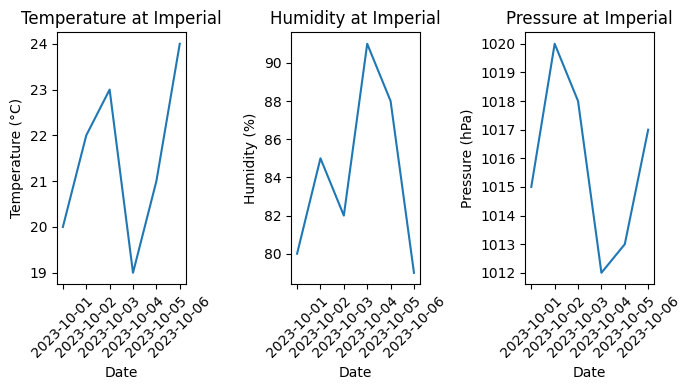

New name: Imperial College London


In [245]:
# =============
#  Weather Station class demo
# =============

# Initialise
station = weather_station("Imperial", (51.4988, 0.1749), 15.0)

# Add data
station.record_temperature(20.0, "2023-10-01")
station.record_temperature(22.0, "2023-10-02")
station.record_temperature(23.0, "2023-10-03")
station.record_temperature(19.0, "2023-10-04")
station.record_temperature(21.0, "2023-10-05")
station.record_temperature(24.0, "2023-10-06")


station.record_humidity(80.0, "2023-10-01")
station.record_humidity(85.0, "2023-10-02")
station.record_humidity(82.0, "2023-10-03")
station.record_humidity(91.0, "2023-10-04")
station.record_humidity(88.0, "2023-10-05")
station.record_humidity(79.0, "2023-10-06")

station.record_pressure(1015.0, "2023-10-01")
station.record_pressure(1020.0, "2023-10-02")
station.record_pressure(1018.0, "2023-10-03")
station.record_pressure(1012.0, "2023-10-04")
station.record_pressure(1013.0, "2023-10-05")
station.record_pressure(1017.0, "2023-10-06")

# Print
print(station)
print("Temperatures (C):", station.celsius)
print("Temperatures (K):", station.kelvin)
print("Temperatures (F):", station.fahrenheit)
print("Dew Points (C):", station.dew_point)
print("Heat Indices (C):", station.heat_index)


# plotting functionality
station.plot.all() # individual serieses also available: .temperature(), .pressure(), .humidity()



# misc functions:
station.rename("Imperial College London")
print(f"New name: {station._name}")
